Sample padded output: [[ 538    1    1  210  807 1205  823 2444    0    0    0    0    0    0
     0    0    0    0    0    0]
 [ 737  399 3332  143    1    1  922  170    0    0    0    0    0    0
     0    0    0    0    0    0]
 [2061 2444    1  399  969 3775    1   85    1 2630    1 1134    0    0
     0    0    0    0    0    0]
 [  66  131  729    1 1789    1    1    1 1789 1827 2339    1    0    0
     0    0    0    0    0    0]
 [3776 2858 3584 2967    1    1    1    1   19   22 2858 3744    1    0
     0    0    0    0    0    0]]


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Epoch 1/20
687/687 ━━━━━━━━━━━━━━━━━━━━ 35s 42ms/step - accuracy: 0.7922 - loss: 1.0638 - val_accuracy: 0.8925 - val_loss: 0.2726
Epoch 2/20
687/687 ━━━━━━━━━━━━━━━━━━━━ 29s 42ms/step - accuracy: 0.9178 - loss: 0.2286 - val_accuracy: 0.9023 - val_loss: 0.2530
Epoch 3/20
687/687 ━━━━━━━━━━━━━━━━━━━━ 28s 41ms/step - accuracy: 0.9292 - loss: 0.1993 - val_accuracy: 0.9041 - val_loss: 0.2647
Epoch 4/20
687/687 ━━━━━━━━━━━━━━━━━━━━ 29s 42ms/step - accuracy: 0.9396 - loss: 0.1715 - val_accuracy: 0.8883 - val_loss: 0.2937
589/589 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step


Accuracy on testing set: 0.9023223680714247
Precision on testing set: 0.9233176838810642
Recall on testing set: 0.877603059923502
Confusion Matrix:
 [[8719  686]
 [1152 8260]]
AUC: 0.9653075253395116


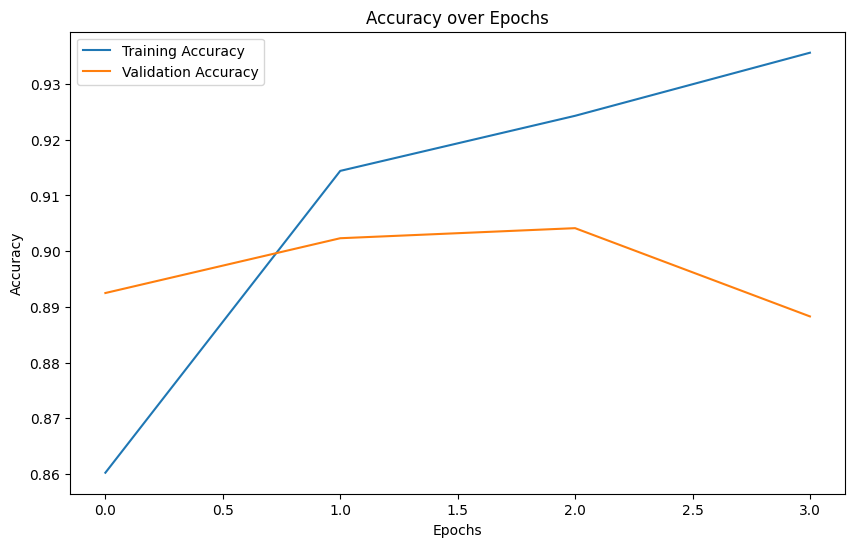

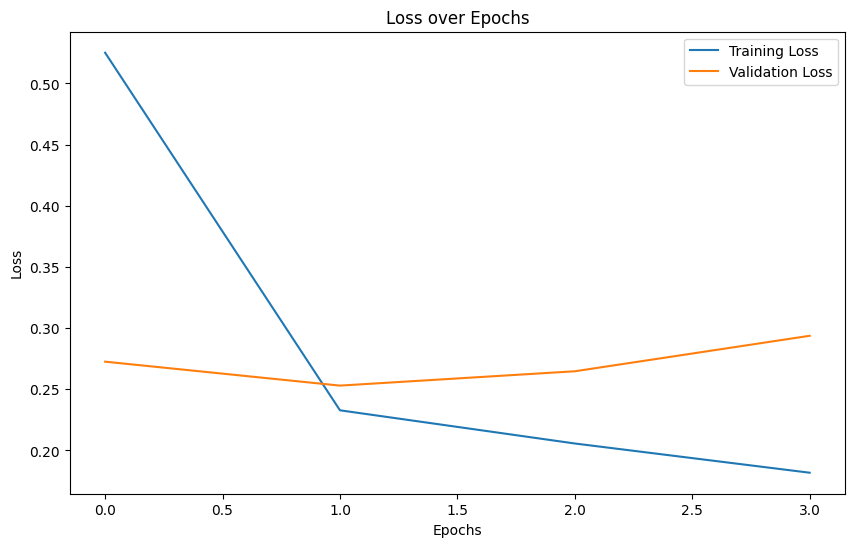

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Bidirectional, Embedding, LSTM, Dropout, Dense
from tensorflow.keras.regularizers import l2
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.preprocessing.text import one_hot
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, roc_auc_score
from imblearn.over_sampling import SMOTE  # To handle class imbalance

# Define custom Hindi stopwords
stopwords_hindi = [
    'अत', 'अपना', 'अपनी', 'अपने', 'अभी', 'अंदर', 'आदि', 'आप', 'इत्यादि', 'इन', 'इनका', 'इन्हीं', 'इन्हें', 'इन्हों',
    'इस', 'इसका', 'इसकी', 'इसके', 'इसमें', 'इसी', 'इसे', 'उन', 'उनका', 'उनकी', 'उनके', 'उनको', 'उन्हीं', 'उन्हें',
    'उन्हों', 'उस', 'उसके', 'उसी', 'उसे', 'एक', 'एवं', 'एस', 'ऐसे', 'और', 'कई', 'कर', 'करता', 'करते', 'करना',
    'करने', 'करें', 'कहते', 'कहा', 'का', 'काफ़ी', 'कि', 'कितना', 'किन्हें', 'किन्हों', 'किया', 'किर', 'किस',
    'किसी', 'किसे', 'की', 'कुछ', 'कुल', 'के', 'को', 'कोई', 'कौन', 'कौन', 'बही', 'बहुत', 'बाद', 'बाला', 'बिलकुल',
    'भी', 'भीतर', 'मगर', 'मानो', 'मे', 'में', 'यदि', 'यह', 'यहाँ', 'यही', 'या', 'यिह', 'ये', 'रखें', 'रहा', 'रहे',
    'ऱ्वासा', 'लिए', 'लिये', 'लेकिन', 'व', 'वग़ैरह', 'वर्ग', 'वह', 'वहाँ', 'वहीं', 'वाले', 'वुह', 'वे', 'सकता',
    'सकते', 'सबसे', 'सभी', 'साथ', 'साबुत', 'साभ', 'सारा', 'से', 'सो', 'संग', 'ही', 'हुआ', 'हुई', 'हुए', 'है',
    'हैं', 'हो', 'होता', 'होती', 'होते', 'होना', 'होने'
]

# Load dataset
data = pd.read_csv('/content/randomized_combined_dataset.csv')

# Drop null values
data = data.dropna()


from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.utils import pad_sequences

# Define stopwords for both Hindi and English
stopwords_hindi = set([
    'अत', 'अपना', 'अपनी', 'अपने', 'अभी', 'अंदर', 'आदि', 'आप', 'इत्यादि', 'इन', 'इनका', 'इन्हीं', 'इन्हें', 'इन्हों',
    'इस', 'इसका', 'इसकी', 'इसके', 'इसमें', 'इसी', 'इसे', 'उन', 'उनका', 'उनकी', 'उनके', 'उनको', 'उन्हीं', 'उन्हें',
    'उन्हों', 'उस', 'उसके', 'उसी', 'उसे', 'एक', 'एवं', 'एस', 'ऐसे', 'और', 'कई', 'कर', 'करता', 'करते', 'करना',
    'करने', 'करें', 'कहते', 'कहा', 'का', 'काफ़ी', 'कि', 'कितना', 'किन्हें', 'किन्हों', 'किया', 'किर', 'किस',
    'किसी', 'किसे', 'की', 'कुछ', 'कुल', 'के', 'को', 'कोई', 'कौन', 'कौन', 'बही', 'बहुत', 'बाद', 'बाला', 'बिलकुल',
    'भी', 'भीतर', 'मगर', 'मानो', 'मे', 'में', 'यदि', 'यह', 'यहाँ', 'यही', 'या', 'यिह', 'ये', 'रखें', 'रहा', 'रहे',
    'ऱ्वासा', 'लिए', 'लिये', 'लेकिन', 'व', 'वग़ैरह', 'वर्ग', 'वह', 'वहाँ', 'वहीं', 'वाले', 'वुह', 'वे', 'सकता',
    'सकते', 'सबसे', 'सभी', 'साथ', 'साबुत', 'साभ', 'सारा', 'से', 'सो', 'संग', 'ही', 'हुआ', 'हुई', 'हुए', 'है',
    'हैं', 'हो', 'होता', 'होती', 'होते', 'होना', 'होने'
])  # Extend this list as needed
stopwords_english = set(["is", "and", "the", "of", "to", "in", "it", "that", "on", "for", "with", "as", "was"])  # Extend this list as needed

# Splitting input and label
x = data['title']  # Example: ["यह किताब अच्छी है", "This is a great book"]
y = data['label']  # Example: [1, 0]

# Preprocessing: Removing stopwords for mixed language dataset
corpus = []
for review in x:
    review = review.split()  # Tokenize into words
    # Remove stopwords for both languages
    review = [word for word in review if word not in stopwords_hindi and word.lower() not in stopwords_english]
    corpus.append(' '.join(review))  # Recombine into processed sentences

# Tokenization and Padding
voc_size = 5000  # Vocabulary size
tokenizer = Tokenizer(num_words=voc_size, oov_token="<OOV>")  # Tokenizer with out-of-vocabulary handling
tokenizer.fit_on_texts(corpus)  # Fit tokenizer on the processed corpus

# Convert text to numerical sequences
sequences = tokenizer.texts_to_sequences(corpus)

# Padding sequences to a fixed length
max_len = 20  # Maximum length for sequences
padded = pad_sequences(sequences, padding='post', maxlen=max_len)

# The padded array contains the tokenized and padded representation of the input data
print("Sample padded output:", padded[:5])  # Display the first 5 padded sequences


# Address class imbalance using SMOTE
smote = SMOTE(random_state=42)
x_smote, y_smote = smote.fit_resample(padded, y)

# Model Building
embed_dim = 50  # Embedding dimension
model = Sequential([
    Embedding(voc_size, embed_dim, input_length=max_len),
    Bidirectional(LSTM(64, kernel_regularizer=l2(0.01))),  # L2 regularization added
    Dropout(0.5),  # Increased dropout to reduce overfitting
    Dense(128, activation='relu', kernel_regularizer=l2(0.01)),
    Dropout(0.5),  # Increased dropout here as well
    Dense(1, activation='sigmoid')  # Binary classification
])

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train-Test Split
trainX, testX, trainY, testY = train_test_split(x_smote, y_smote, test_size=0.3, random_state=0)

# Early stopping to prevent overfitting
early_stop = EarlyStopping(monitor='val_loss', patience=2, restore_best_weights=True)

# Training
history = model.fit(
    trainX, trainY,
    epochs=20,
    validation_data=(testX, testY),
    batch_size=64,
    callbacks=[early_stop]
)

# Predictions and Evaluation
pred = model.predict(testX)
binary_predictions = [1 if i >= 0.5 else 0 for i in pred.flatten()]

# Performance Metrics
print('Accuracy on testing set:', accuracy_score(testY, binary_predictions))
print('Precision on testing set:', precision_score(testY, binary_predictions))
print('Recall on testing set:', recall_score(testY, binary_predictions))

# Confusion Matrix and AUC
cm = confusion_matrix(testY, binary_predictions)
probs = pred.flatten()
auc = roc_auc_score(testY, probs)

print('Confusion Matrix:\n', cm)
print('AUC:', auc)

# Save the model
model.save('bidirectional_lstm_model_prevent_overfitting.h5')

# Visualize Training Progress
plt.figure(figsize=(10, 6))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


In [ ]:
# Manual testing function
def manual_testing(input_text):
    # Tokenize and preprocess the input text (similar to training preprocessing)
    input_text = input_text.split()  # Tokenize into words

    # Remove stopwords for both Hindi and English
    input_text = [word for word in input_text if word not in stopwords_hindi and word.lower() not in stopwords_english]

    # Recombine processed words into a single string
    input_text = ' '.join(input_text)

    # Convert the input text to sequences
    input_sequence = tokenizer.texts_to_sequences([input_text])

    # Pad the input sequence to the same length used during training
    input_padded = pad_sequences(input_sequence, padding='post', maxlen=max_len)

    # Make a prediction using the trained model
    prediction = model.predict(input_padded)

    # Convert prediction probability to binary output (0 or 1)
    binary_prediction = 1 if prediction >= 0.5 else 0

    # Display the prediction result
    if binary_prediction == 1:
        print(f"The input text is classified as: Fake News (1)")
    else:
        print(f"The input text is classified as: Real News (0)")

# Example usage
sample_text = "भारत सरकार ने 2000 रुपये के नोट बंद करने का फैसला किया है।"  # Test with a Hindi sentence
manual_testing(sample_text)

sample_text = "Aliens have landed on Earth"  # Test with an English sentence
manual_testing(sample_text)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step
The input text is classified as: Fake News (1)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 111ms/step
The input text is classified as: Fake News (1)
